## Основы статистики
https://stepik.org/course/76/syllabus
### 2. Сравнение средних
### 2.1 T-распределение

In [1]:
from scipy import stats
import numpy as np

def get_se(sd, N):
    '''Стандартная ошибка'''
    return sd/np.sqrt(N)

def z_stat(X, M, sd, N):
    '''z-значение'''
    se = get_se(sd, N)
    return (X-M)/se

def p_value_norm(z_stat, alternative = 'two-sided'):
    '''p_value для нормального распределения'''
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [2]:
#шаги 6-9

z = z_stat(10.8, 10, 2, 25)
p_value_norm(2, 'two-sided')

0.04550026389635842

In [3]:
#шаги 6-9
#используем t-распределение

def p_value_t(t_stat, N, alternative = 'two-sided'):
    df = N-1 #кол-во степеней свободы
    if alternative == 'two-sided':
        return 2*(1-stats.t.cdf(np.abs(t_stat),df))
    if alternative == 'less':
        return stats.t.cdf(t_stat, df)
    if alternative == 'greater':
        return 1 - stats.t.cdf(t_stat, df)

p_value_t(z, 25)

0.0569398499365914

In [4]:
#шаг 10
p_value_t(-2, 15)

0.06528795288911193

### 2.2 Сравнение двух средних; t-критерий Стьюдента

In [5]:
#парный t-тест (t-критерий Стьюдента)

def t_stat(X1, X2, sd1, sd2, N1, N2):
    se = np.sqrt(sd1**2/N1+sd2**2/N2)
    return (X1-X2)/se

def p_value_t_pair(t_stat, N1, N2, alternative = 'two-sided'):
    df = N1+N2-2 #кол-во степеней свободы
    if alternative == 'two-sided':
        return 2*(1-stats.t.cdf(np.abs(t_stat),df))
    if alternative == 'less':
        return stats.t.cdf(t_stat, df)
    if alternative == 'greater':
        return 1 - stats.t.cdf(t_stat, df)

In [6]:
#шаг 12

t = t_stat(45,34,9,10,100,100)
p_value_t_pair(t, 100, 100)

3.441691376337985e-14

### 2.3  Проверка распределения на нормальность, QQ-Plot

In [7]:
import math
from matplotlib import pyplot as plt
import random
import scipy.stats as stats


data = stats.norm.rvs(10.0,5,size=1000)
mu, std = stats.norm.fit(data)

plt.hist(data, bins = 100, alpha = 0.5, density = True);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
#критерий Shapiro-Wilk

p_value = stats.shapiro(x)[1]
print(p_value)

0.0017219304572790861


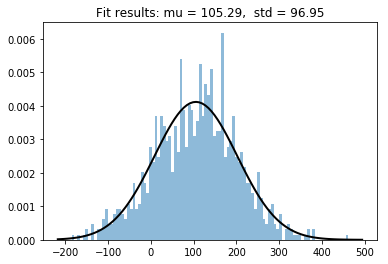

In [9]:
#визуальное сравнение с нормальным распределением

r = np.random.normal(100,100,1000)

mu, std = stats.norm.fit(r)

plt.hist(r, bins = 100, alpha = 0.5, density = True);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [10]:
#критерий Shapiro-Wilk

p_sign, p_value = stats.shapiro(x)
print('P significance level is %.5f' %(p_sign))
print('P-value is %.5f' %(p_value))

P significance level is 0.95473
P-value is 0.00172


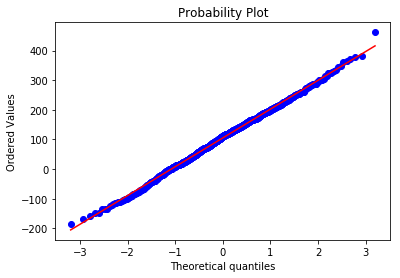

In [11]:
#qq plot

stats.probplot(r, dist="norm", plot=plt)
plt.show();

In [12]:
#U-тест Манна-Уинтни

#добавим выбросы
r[-1] = 1000000
x[0] = -1000000

p_value = stats.mannwhitneyu(r, x)[1]

print('P-value is %.5f' %(p_value))

P-value is 0.06784


### 2.4 Однофакторный дисперсионный анализ

In [13]:
#расчет F-значения

def MSbg(*args):
    '''Межгруповой средний квадрат'''
    groups = [x for x in args]
    m = len(groups)
    mean = np.mean([item for sublist in groups for item in sublist])
    ssb = 0
    for item in groups:
        ssb +=len(item)*(np.mean(item)-mean)**2
   
    return ssb/(m-1)


def MSwg(*args):
    '''Внутригрупповой средний квадрат'''
    groups = [x for x in args]
    N = len([item for sublist in groups for item in sublist])
    m = len(groups)
    ssw = 0
    for sublist in groups:
        sublist_mean = np.mean(sublist)
        for item in sublist:
            ssw+=(item-sublist_mean)**2
            
    return ssw/(N-m)

def F_stat(*args):
    return MSbg(*args)/MSwg(*args)

def p_value_F(f_stat, N, m):
    df1 = m-1 #кол-во степеней свободы 1 (m-1)
    df2 = N-m #кол-во степеней свободы 2 (N-m)
    return 1 - stats.f.cdf(f_stat, df1, df2)

In [14]:
#шаги 1-10
x1,x2,x3 = [3,2,1],[5,3,4],[7,6,5]

f_stat = F_stat(x1,x2,x3)
print('P-value for this example is: %.5f' %p_value_F(f_stat, 9, 3))

P-value for this example is: 0.00800


P-value < 0.05, отклоняем нулевую гипотезу о схожести групп. Как минимум 2 средних отличаются друг от друга.

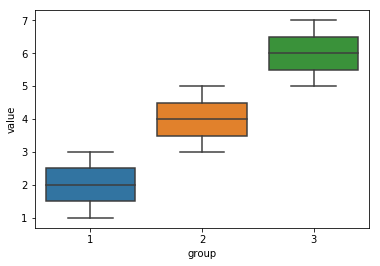

In [15]:
#визуализация результата

import pandas as pd
import seaborn as sns

l = [x1,x2,x3]

df = pd.DataFrame(columns=['value','group']) #.reset_index()
for idx in range(len(l)):
    tmp = pd.DataFrame({'value':l[idx], 'group':idx+1})
    df = pd.concat([df,tmp])

df['value'] = df['value'].astype('int')
sns.boxplot(x = 'group', y = 'value', data = df);

### 2.5 Множественные сравнения в ANOVA

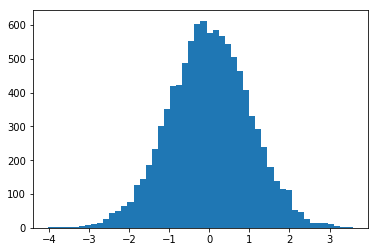

In [16]:
#генеральная совокупнасть, распределенная нормально (M=0, D=1)

r = np.random.normal(0,1,10000)

plt.hist(r, bins = 50);

In [17]:
#функции для получения случайной выборки и N случайных выборок размера n

import random
def get_random_example(X, n):
    idx = [random.randrange(0, len(X), 1) for i in range(n)]
    return [X[i] for i in idx]

def get_multiple_examples(X,N,n):
    examples = list()
    for item in range(N):
        examples.append(get_random_example(X,n))
    return examples

In [18]:
from itertools import combinations

#1000 раз получаем N выборок

exs = []
for i in range(1000):
    exs.append(get_multiple_examples(X=r, N=8, n=30))
    
#считаем по ним необходимые статистики (Xср, станд. откл, кол-во элементов)    
sstats = []
for subset in exs:
    sstats.append(
        [ {
        'X':np.mean(x),
        'std':np.std(x),
        'N':len(x)
    }
    for x in subset]
    )
    
#формируем все возможные пары для каждой группы выборок
combs = [list(combinations(x,2)) for x in sstats]

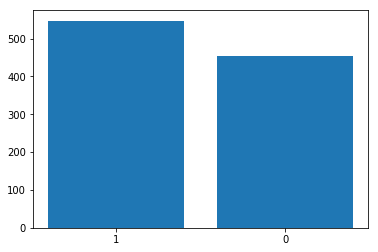

In [19]:
#функции из 2.2

def t_stat(X1, X2, sd1, sd2, N1, N2):
    se = np.sqrt(sd1**2/N1+sd2**2/N2)
    return (X1-X2)/se

def p_value_t_pair(t_stat, N1, N2, alternative = 'two-sided'):
    df = N1+N2-2 #кол-во степеней свободы
    if alternative == 'two-sided':
        return 2*(1-stats.t.cdf(np.abs(t_stat),df))
    if alternative == 'less':
        return stats.t.cdf(t_stat, df)
    if alternative == 'greater':
        return 1 - stats.t.cdf(t_stat, df)


def false_alarm(combs):
    p_stats = list()
    for element in combs:
        elem_stat = list()
        for pair in element:
            N1 = pair[0]['N']
            N2 = pair[1]['N']
            t_st =  t_stat(
                    X1 = pair[0]['X'],
                    X2 = pair[1]['X'],
                    sd1 = pair[0]['std'],
                    sd2 = pair[1]['std'],
                    N1 = N1,
                    N2 = N2
            )
            p_val = p_value_t_pair(
                t_stat = t_st,
                N1 = N1,
                N2 = N2
            )
            elem_stat.append(p_val)

        p_stats.append(elem_stat)

    final = []
    for item in p_stats:
        final.append(
             1 if any(x < 0.05 for x in item) else 0
        )

    final_d = {
        '1':sum(final),
        '0':len(final)-sum(final)
    }
    return final_d

final_d = false_alarm(combs)
plt.bar(final_d.keys(), final_d.values());